In [198]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.arima_model import ARIMA

import ipywidgets as widgets
from ipywidgets import interact

import sys
sys.path.insert(0, os.path.abspath('../Libraries'))
import countries as cLib

In [199]:
df = pd.read_csv('../Datasets/cleaned_Productivity.csv')
df.drop('mean', axis=1, inplace=True)
df_formatted = pd.melt(df, id_vars = ['LOCATION'], var_name = 'YEAR', value_name= 'PRODUCTIVITY')
df_formatted = df_formatted.sort_values(['LOCATION', 'YEAR'], ascending=[True, True])
df_formatted = df_formatted.reset_index(drop=True)
df_formatted['YEAR'] = pd.to_numeric(df_formatted['YEAR'])

# Per country

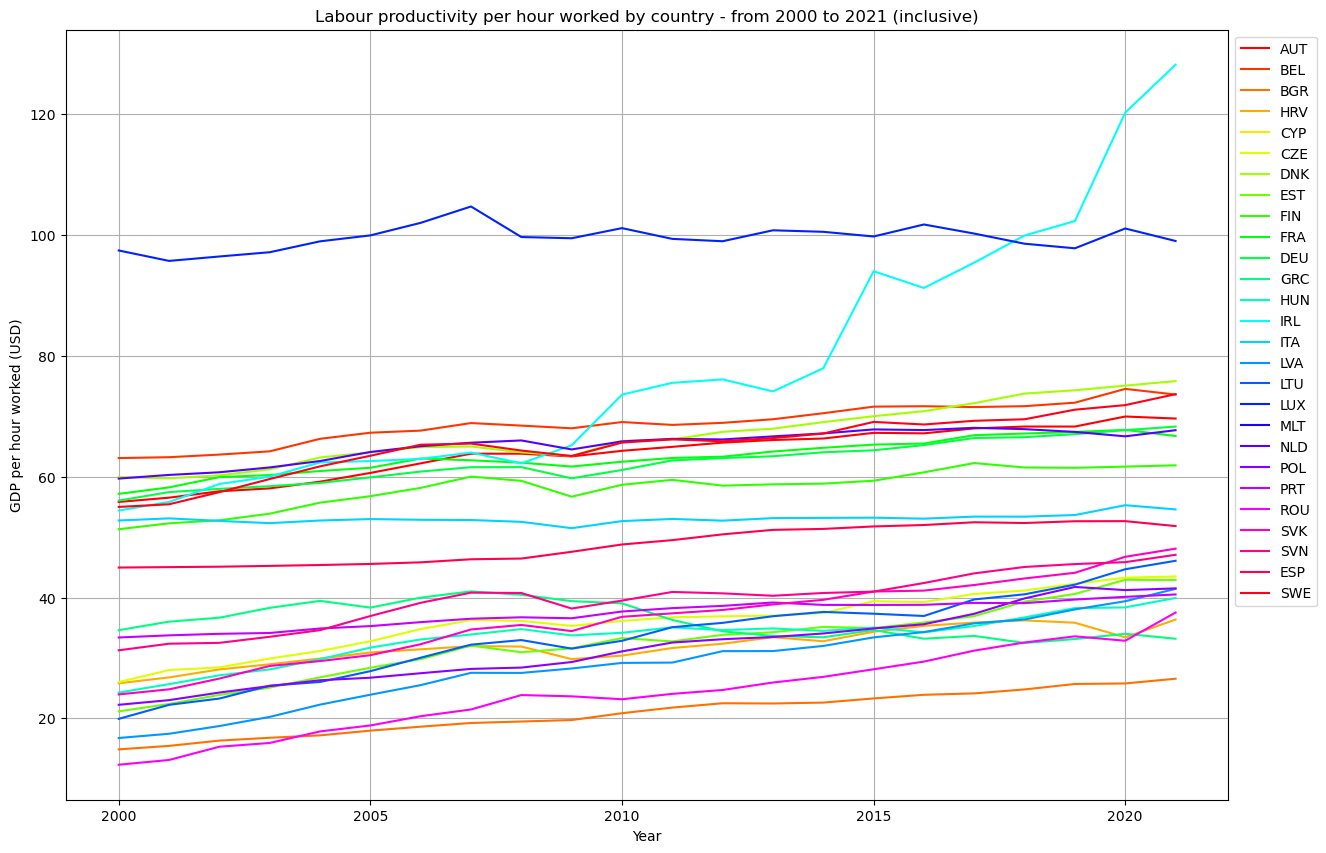

In [200]:
# Plot the data
plt.subplots(figsize=(15, 10))
countries = cLib.get_countries()
colors = plt.cm.hsv(np.linspace(0, 1, len(countries)))

for i, country in enumerate(countries):
    country_code = cLib.get_country_data(country).alpha3
    country_data = df_formatted[df_formatted['LOCATION'] == country_code]
    plt.plot(country_data['YEAR'], country_data['PRODUCTIVITY'], color=colors[i], label=country_code)
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel("Year")
plt.ylabel('GDP per hour worked (USD)')
plt.title("Labour productivity per hour worked by country - from 2000 to 2021 (inclusive)")
plt.show()

## Exponential smoothing

In [201]:
# REFERENCE: https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html
def plot_smoothed_data(name, series, index):
    # Smooth series and predict 5 years ahead
    pred_date_start = 2022
    pred_date_end = 2022 + 5
    index_pred = pd.date_range(start=str(pred_date_start - 1), end=str(pred_date_end), freq='Y')

    # Simple Exponential Smoothing (SES)
    fit = SimpleExpSmoothing(series, initialization_method="estimated").fit()
    forecast = fit.forecast(5)
    ses_smoothed = fit.fittedvalues
    ses_forecast = forecast.values
    ses_forecast = np.insert(ses_forecast, 0, ses_smoothed[-1])

    # Exponential Smoothing
    fit = ExponentialSmoothing(
        series,
        trend="add",
        use_boxcox=True,
        initialization_method="estimated"
    ).fit()
    forecast = fit.forecast(5)
    exp_smoothed = fit.fittedvalues
    exp_forecast = forecast.values
    exp_forecast = np.insert(exp_forecast, 0, exp_smoothed[-1])

    plt.plot(index, series, color='black', label='Actual')
    plt.plot(index, ses_smoothed, color='red', label='SES smoothing', linestyle='--')
    plt.plot(index_pred, ses_forecast, color='red', label='SES Forecast', linestyle='dotted')
    plt.plot(index, exp_smoothed, color='blue', label='Exponential smoothing', linestyle='--')
    plt.plot(index_pred, exp_forecast, color='blue', label='Exponential Forecast', linestyle='dotted')
    
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
    plt.xlabel("Year")
    plt.ylabel('GDP per hour worked (USD)')
    plt.title(f"Labour productivity per hour worked by {name} - from 2000 to 2021 (inclusive)")
    plt.show()

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


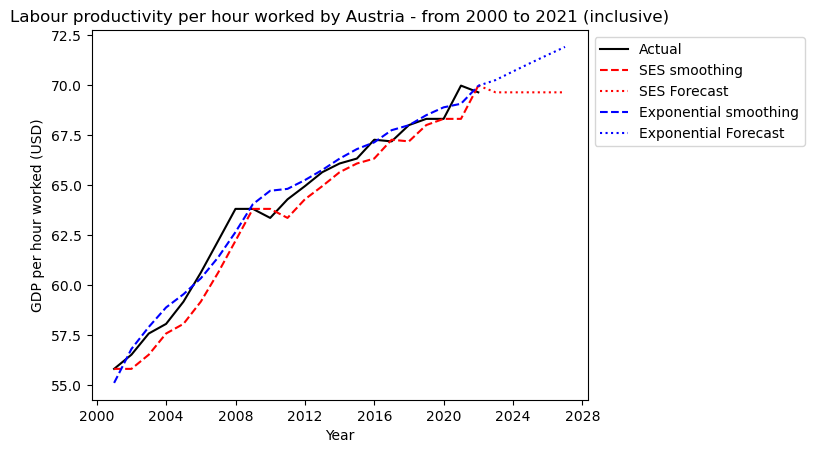

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


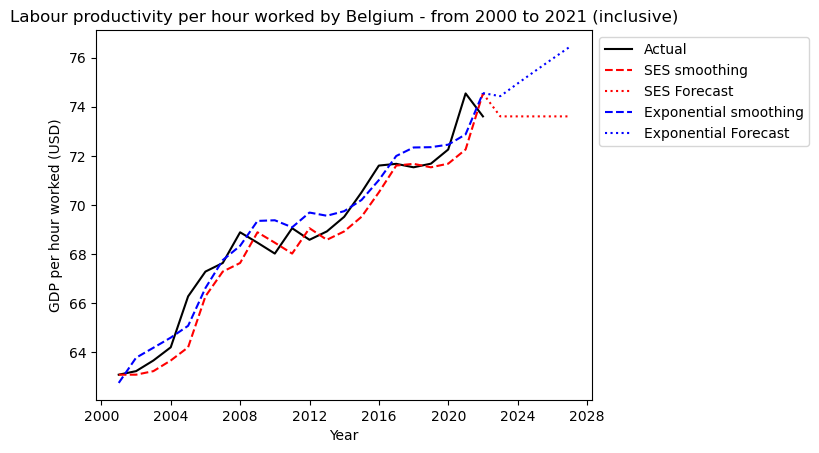

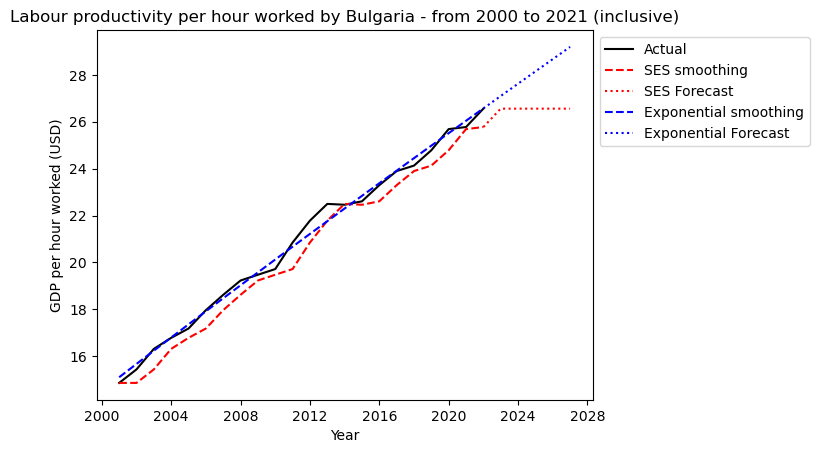

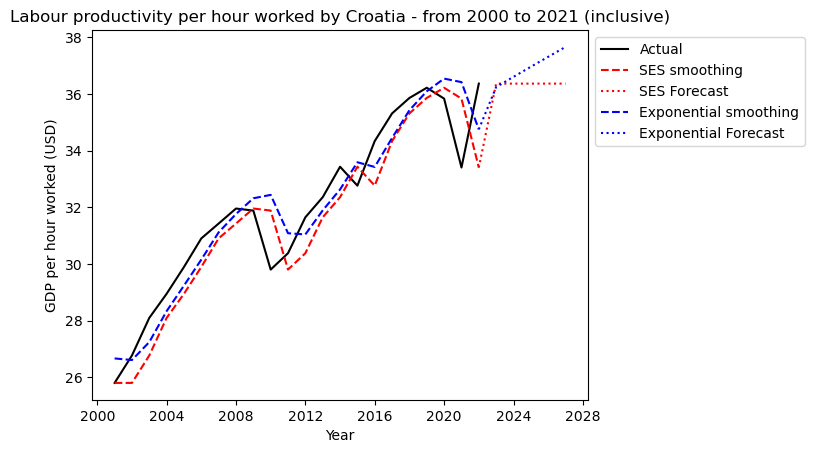

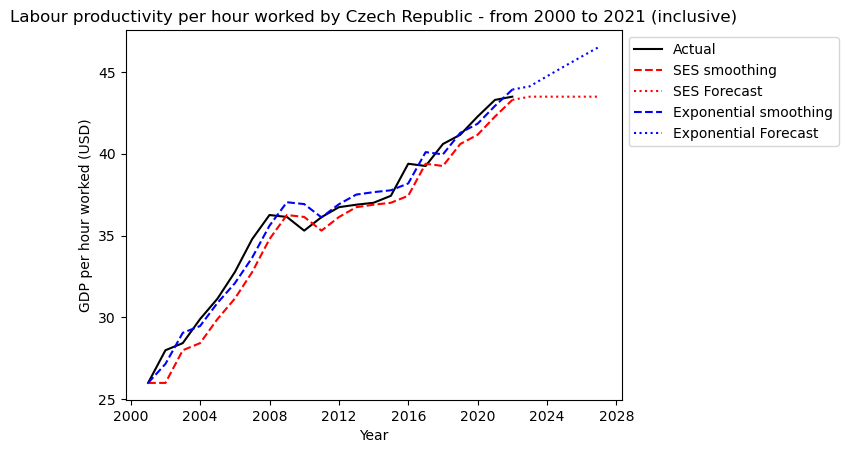

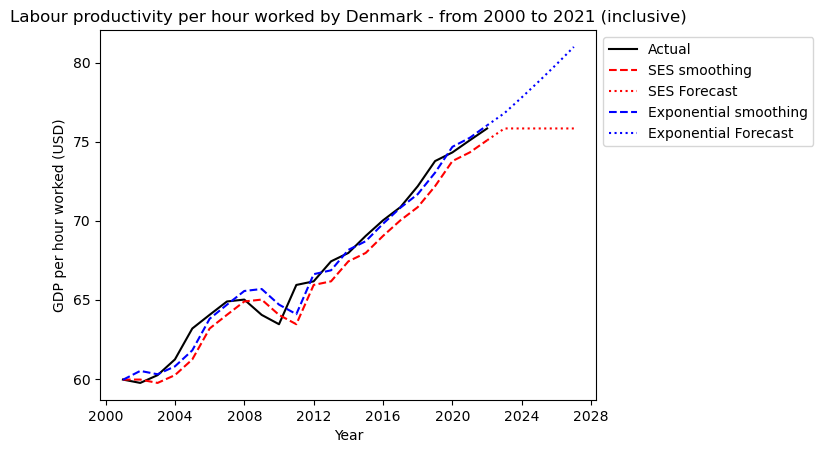

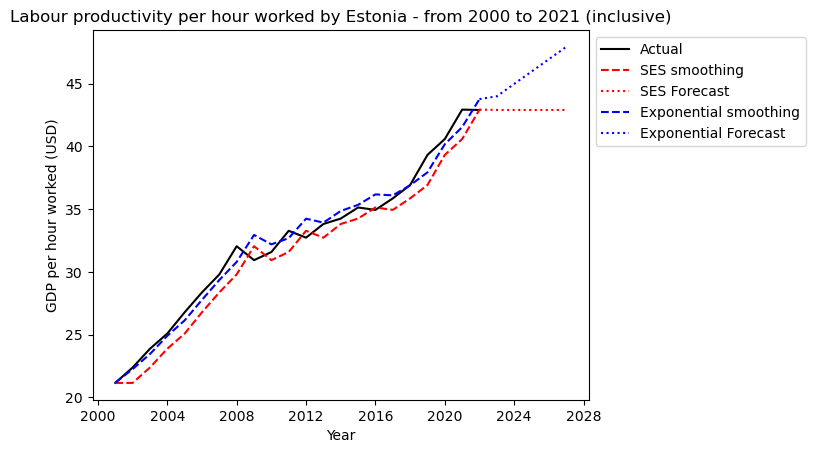

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


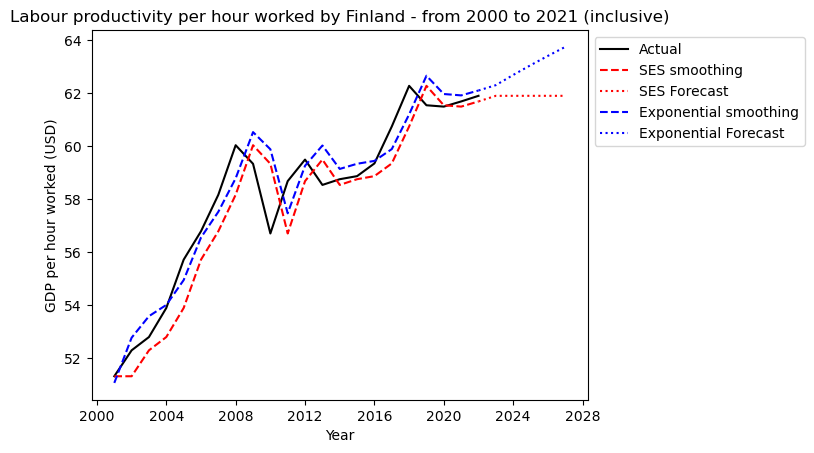

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


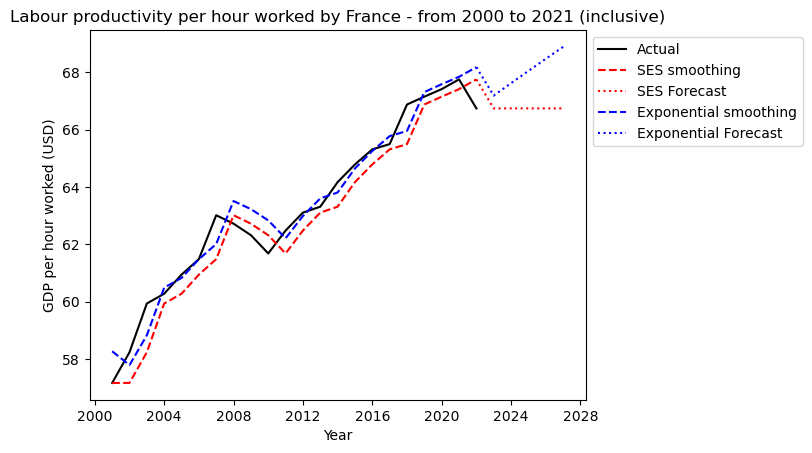

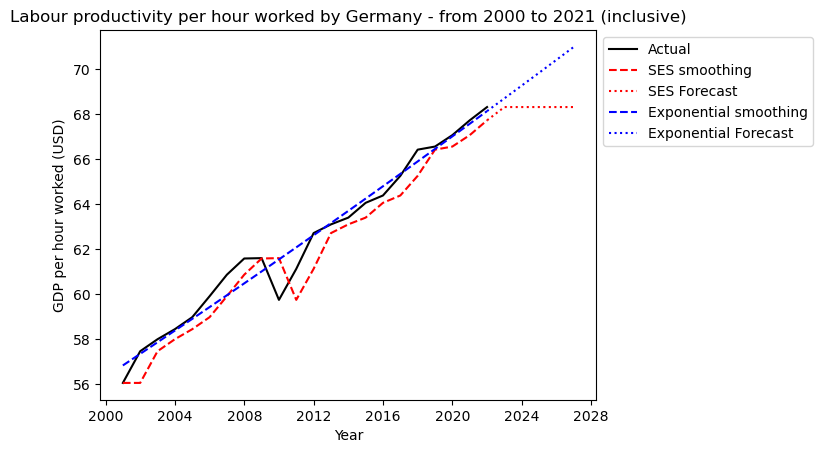

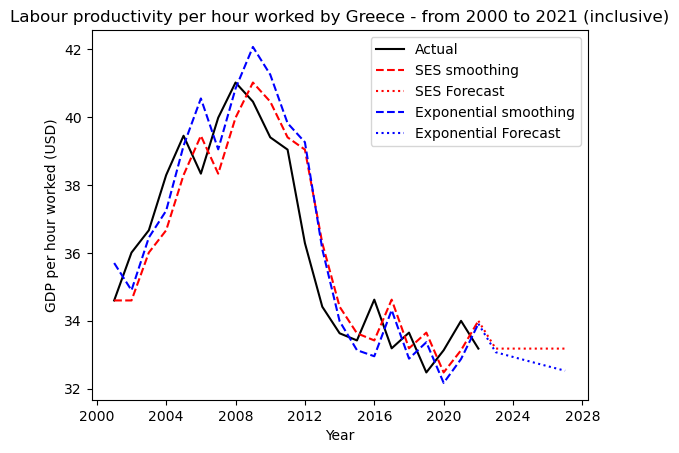

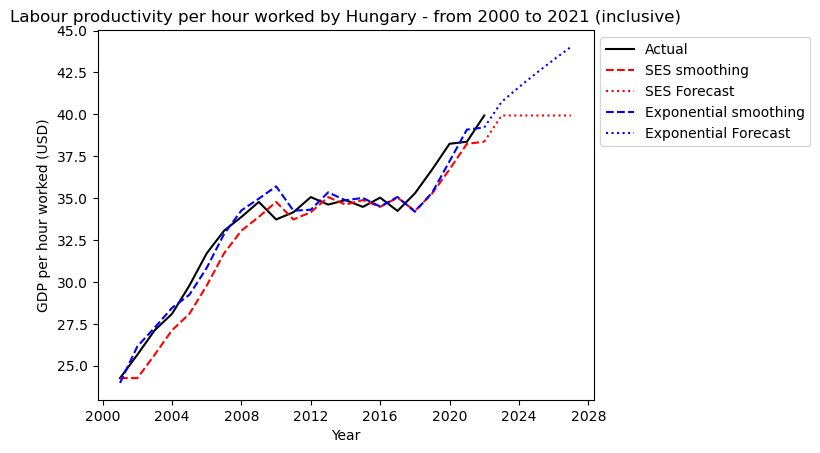

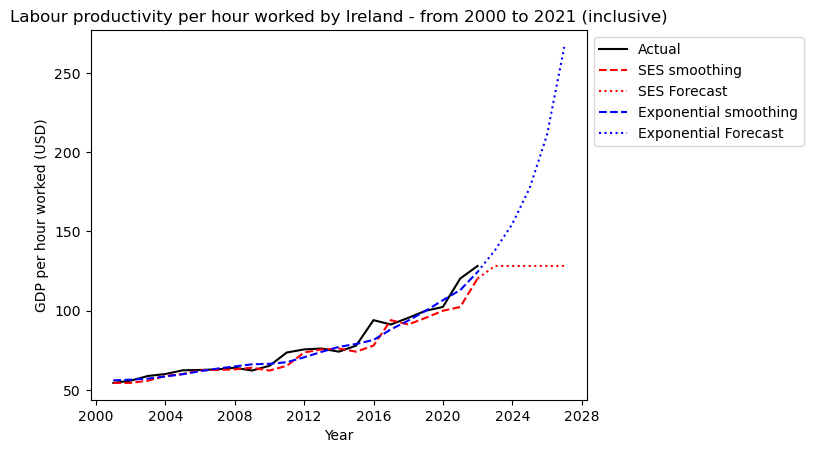

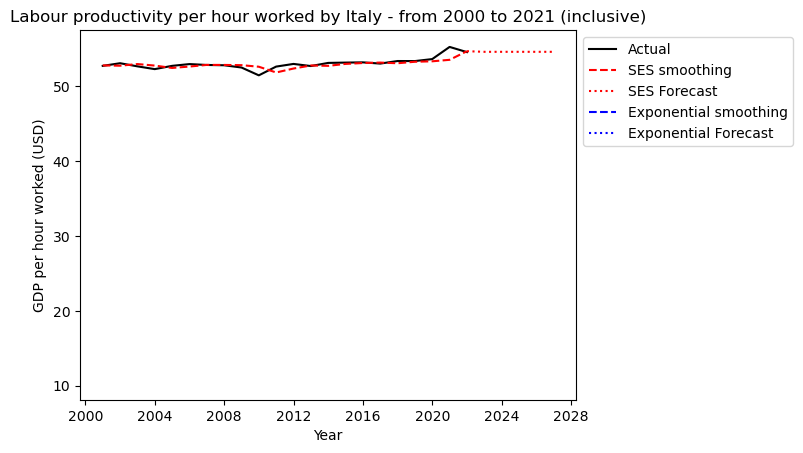

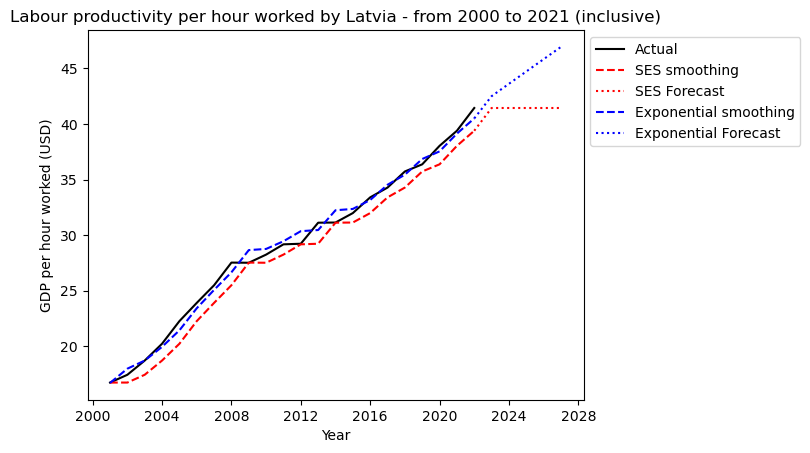

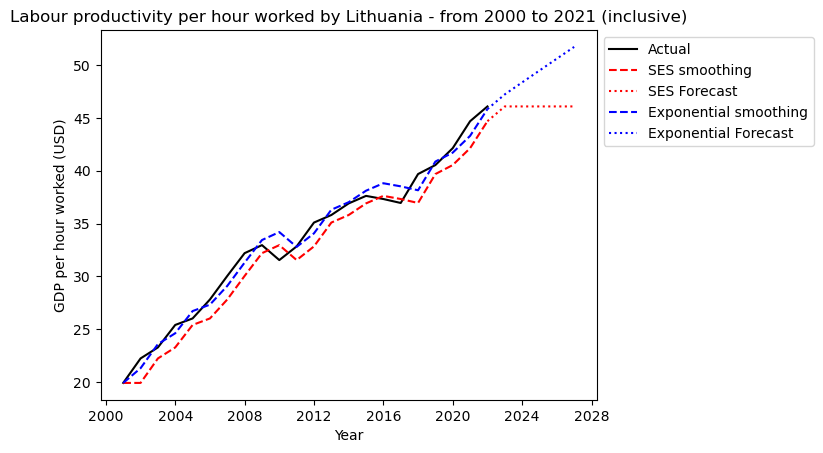

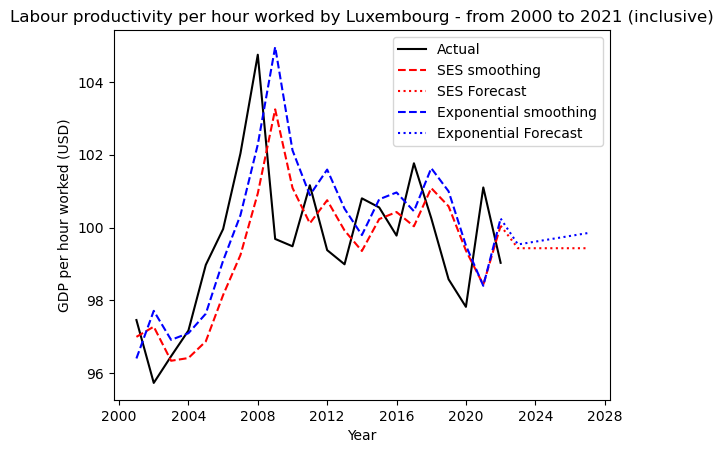

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


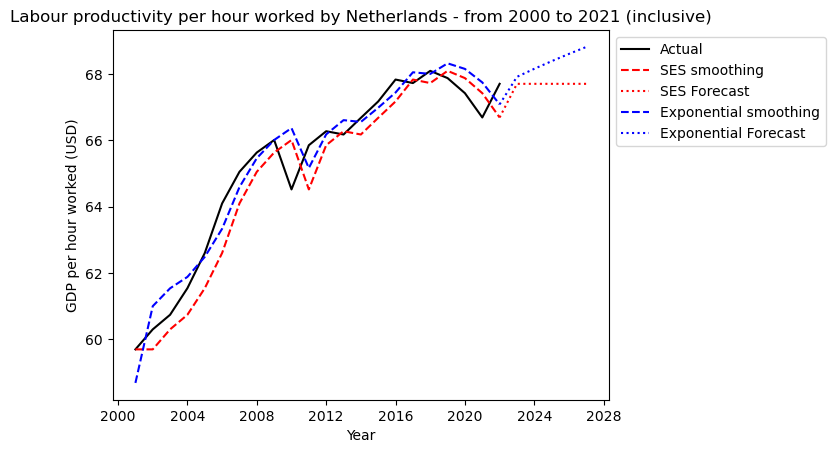

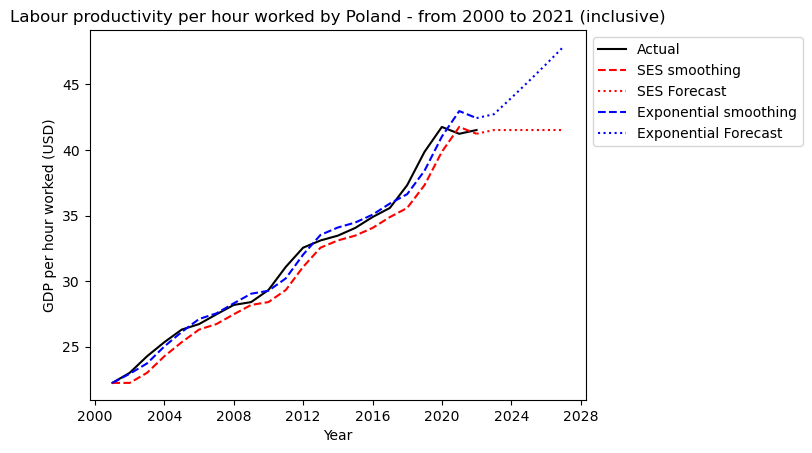

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


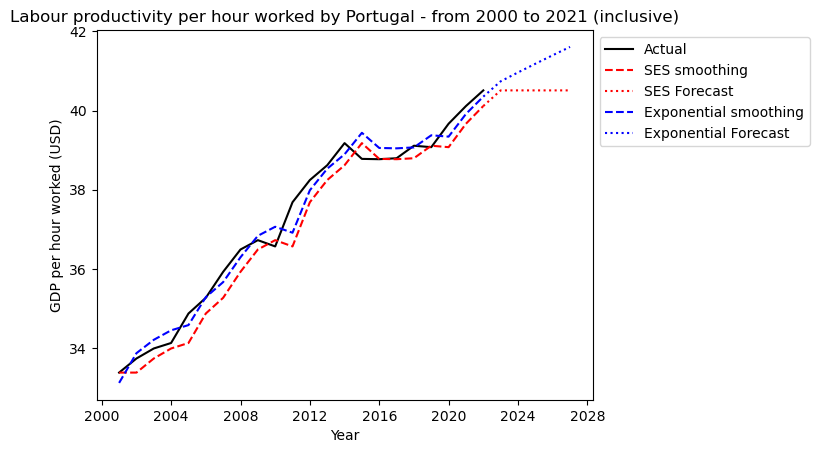

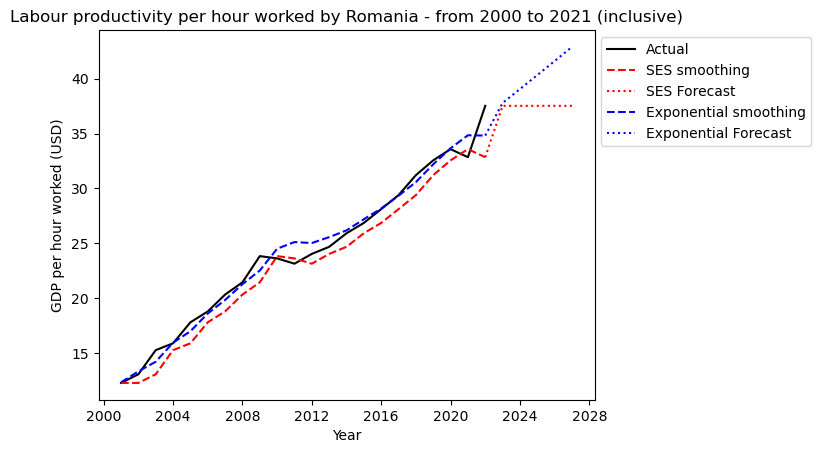

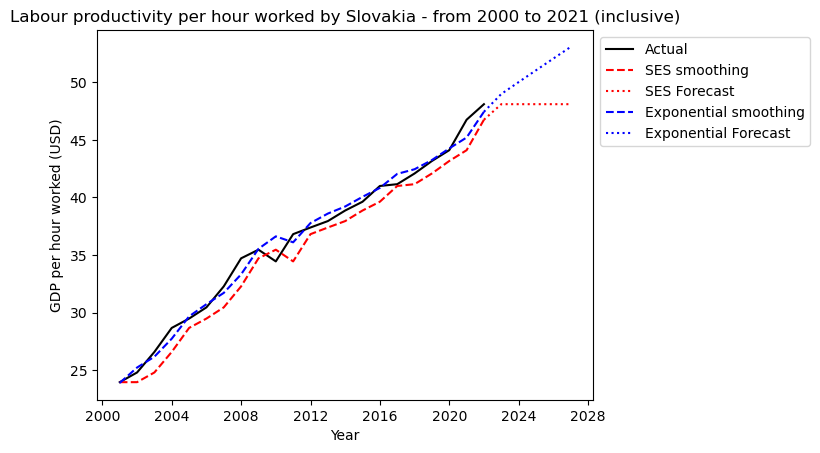

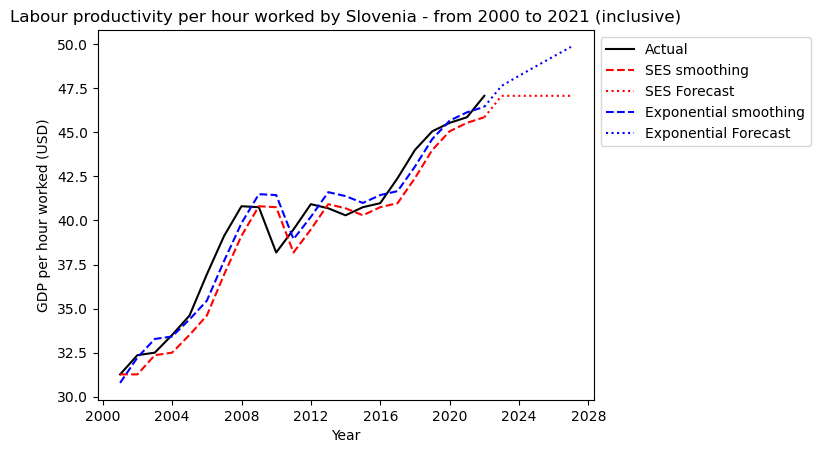

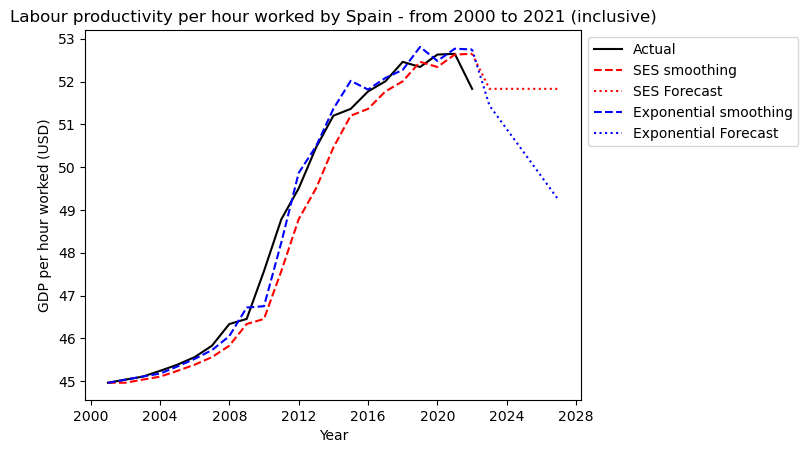

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


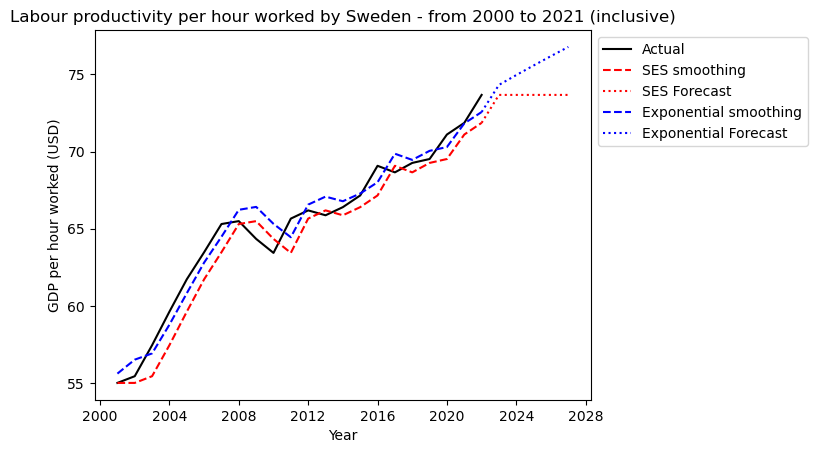

In [202]:
for country in cLib.get_countries():
    # Get country data and make index the year
    country_code = cLib.get_country_data(country).alpha3
    country_data = df_formatted[df_formatted['LOCATION'] == country_code]
    country_data.set_index('YEAR', inplace=True)
    country_data.index.freq = 'Y'
    index = pd.date_range(start='2000', end='2022', freq='Y')

    # Ignore time series with no values
    if len(country_data['PRODUCTIVITY'].values) == 0:
        continue

    # Plot the data
    country_series = pd.Series(country_data['PRODUCTIVITY'].values, index=index)
    plot_smoothed_data(country, country_series, index)

Due to the horizontal line from the SES prediction (SES assumes that the time series has an underlying constant level), it is clearly a poor choice for predicting, so the general exponential smoothing will be used instead

In [203]:
# Get the mean data for each year
path = "../Datasets/cleaned_Productivity.csv"
df_labour = pd.read_csv(path)
df_labour.rename(columns=lambda x: int(x) if x.isdigit() else x, inplace=True)
df_labour.drop(columns=['mean'], inplace=True)
df_labour = df_labour[df_labour['LOCATION'].isin(cLib.get_alpha_3_list())]
df_labour.reset_index(drop=True, inplace=True)
df_labour_mean = df_labour.mean(numeric_only=True, axis=0)
df_labour_mean = pd.DataFrame(df_labour_mean, columns=['PRODUCTIVITY'])
df_labour_mean.index.freq = 'Y'

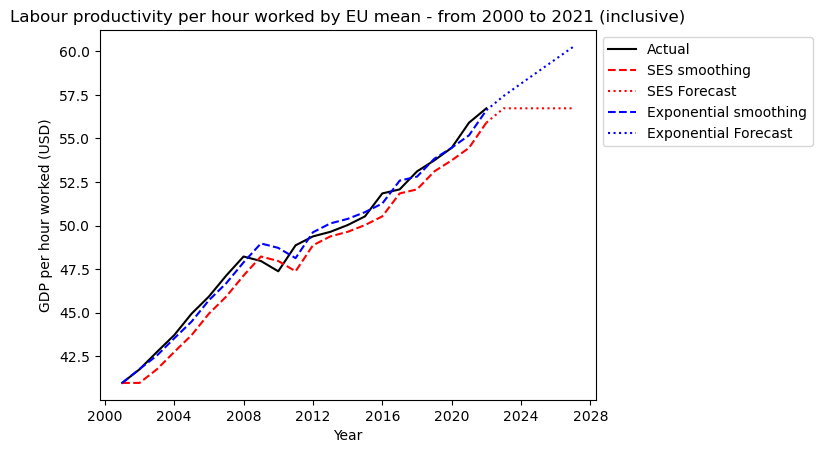

In [204]:
# Exponential smoothing
index = pd.date_range(start='2000', end='2022', freq='Y')
labour_mean_series = pd.Series(df_labour_mean['PRODUCTIVITY'].values, index=index)
plot_smoothed_data("EU mean", labour_mean_series, index)

Let's see if we limit the time series up to 2016, can it predict accurately up to 2021?

c:\Users\jylin\anaconda3\envs\ads_labs\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


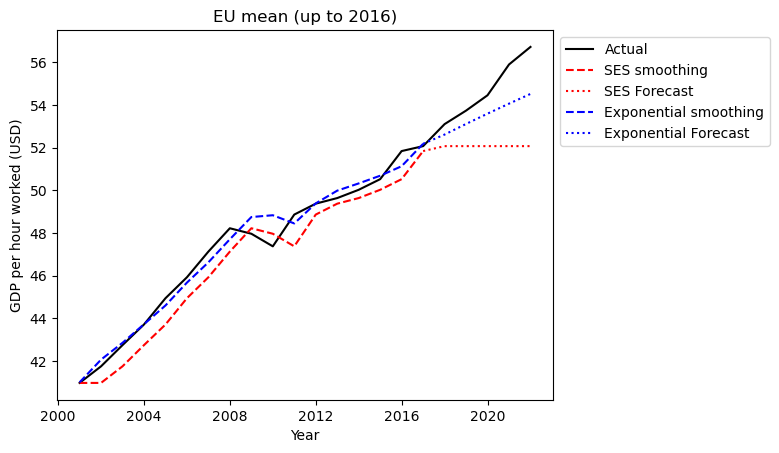

In [210]:
def plot_smoothed_data_past(title, series, index, pred_date_start=2022):
    # Smooth series and predict 5 years ahead
    pred_date_end = pred_date_start + 5
    actual_time = pred_date_start - 2000
    prediction_time = pred_date_end - pred_date_start
    index_actual = pd.date_range(start='2000', end=str(pred_date_start), freq='Y')
    index_pred = pd.date_range(start=str(pred_date_start - 1), end=str(pred_date_end), freq='Y')

    # Simple Exponential Smoothing (SES)
    fit = SimpleExpSmoothing(series[:actual_time], initialization_method="estimated").fit()
    forecast = fit.forecast(prediction_time)
    ses_smoothed = fit.fittedvalues
    ses_forecast = forecast.values
    ses_forecast = np.insert(ses_forecast, 0, ses_smoothed[-1])

    # Exponential Smoothing
    fit = ExponentialSmoothing(
        series[:actual_time],
        trend="add",
        use_boxcox=True,
        initialization_method="estimated"
    ).fit()
    forecast = fit.forecast(5)
    exp_smoothed = fit.fittedvalues
    exp_forecast = forecast.values
    exp_forecast = np.insert(exp_forecast, 0, exp_smoothed[-1])

    plt.plot(index, series, color='black', label='Actual')
    plt.plot(index_actual, ses_smoothed, color='red', label='SES smoothing', linestyle='--')
    plt.plot(index_pred, ses_forecast, color='red', label='SES Forecast', linestyle='dotted')
    plt.plot(index_actual, exp_smoothed, color='blue', label='Exponential smoothing', linestyle='--')
    plt.plot(index_pred, exp_forecast, color='blue', label='Exponential Forecast', linestyle='dotted')
    
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
    plt.xlabel("Year")
    plt.ylabel('GDP per hour worked (USD)')
    plt.title(title)
    plt.show()
plot_smoothed_data_past("EU mean (up to 2016)", labour_mean_series, index, pred_date_start=2017)

The issue with using Exponential Smoothing is that it seems to push the trends forwards in time (see 2009). So while it can do a decent job at predicting the future, it probably is not a good choice for filling in missing data.

Furthermore, it isn't that great at predicting the future, so going to look into ARIMA

## ARIMA

# Per subregions

In [206]:
# Get mean productivity for each subregion per year
subregions_dict = cLib.get_subregions_data()
subregions = cLib.get_subregions()
countries =  cLib.get_countries()
df_subregions = pd.DataFrame(columns=['SUBREGION', 'YEAR', 'PRODUCTIVITY'])
subregion_productivity = {}
for subregion in subregions:
    for year in range(2000, 2022):
        df_toadd = pd.DataFrame({'SUBREGION': subregion, 'YEAR': year, 'PRODUCTIVITY': 0}, index=[0])
        df_subregions = pd.concat([df_subregions, df_toadd], ignore_index=True)

# Fill empty dataframe with mean of productivity for each subregion
for subregion in subregions:
    subregion_productivity[subregion] = {}
    for year in range(2000, 2022):
        subregion_productivity[subregion][year] = 0

for subregion in subregions:
    for country in subregions_dict[subregion]:
        country_code = cLib.get_country_data(country).alpha3
        df_country = df_formatted[df_formatted['LOCATION'] == country_code]
        for year in range(2000, 2022):
            df_toadd = df_country[df_country['YEAR'] == year]
            if not df_toadd.empty:
                subregion_productivity[subregion][year] += df_toadd['PRODUCTIVITY'].values[0]

for subregion in subregions:
    for year in range(2000, 2022):
        mean_val = subregion_productivity[subregion][year] / len(subregions_dict[subregion])
        df_subregions.loc[(df_subregions['SUBREGION'] == subregion) & (df_subregions['YEAR'] == year), 'PRODUCTIVITY'] = mean_val

df_subregions.head()

,SUBREGION,YEAR,PRODUCTIVITY
0,Central Europe,2000,34.228938
1,Central Europe,2001,35.40208
2,Central Europe,2002,36.355127
3,Central Europe,2003,37.432391
4,Central Europe,2004,38.496143


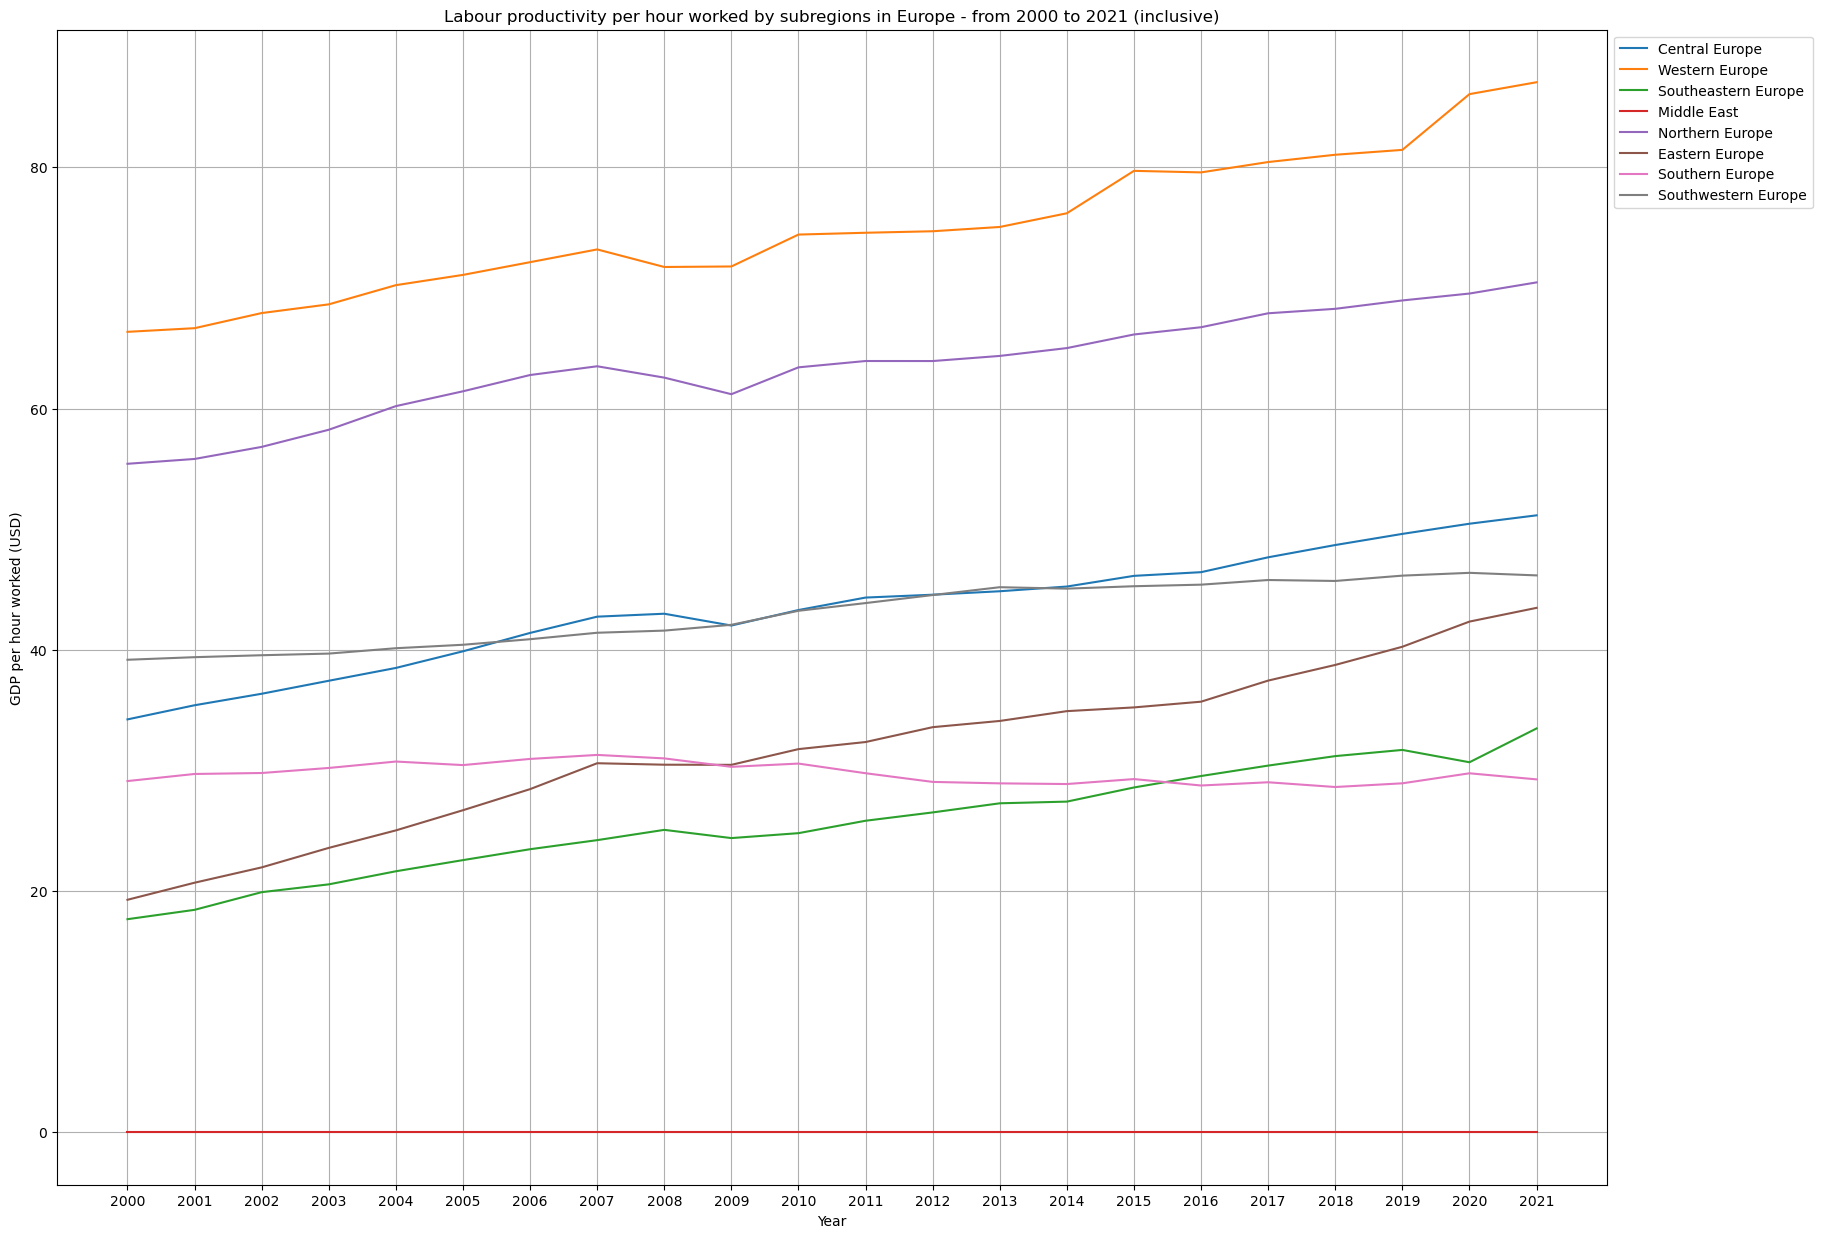

In [207]:
# Plot productivity for each subregion
plt.figure(figsize=(20, 15))
colors = plt.cm.hsv(np.linspace(0, 1, len(subregions)))

for subregion in subregions:
    df_subregion = df_subregions[df_subregions['SUBREGION'] == subregion]
    plt.plot(df_subregion['YEAR'].astype(str), df_subregion['PRODUCTIVITY'], label=subregion)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel("Year")
plt.ylabel('GDP per hour worked (USD)')
plt.title("Labour productivity per hour worked by subregions in Europe - from 2000 to 2021 (inclusive)")
plt.show()